In [175]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Make target lists for masks

The first line of your file should be a header line with column names, selected from the following options (lowercase only, please):

**name, ra, dec, magnitude, priority, pm-ra, pm-dec, epoch, type**

Only ra and dec are required, but name, magnitude, & priority are also recommended. (1=highest priority, then 2, 3, etc). See help page for details.

1. Known LAEs + stars
2. MgII emitters
3. High z A catalog
4. High z B catalog
5. Sirio A
6. Sandro A
7. Sandro B (ordered by magnitude)
8. Sirio B

In [4]:
os.listdir('target_lists/')

['knownLAEs_cat_matchFinkelstein.dat',
 'pri1_knownLAEs_cat_matchFinkelstein.dat',
 'pri2_MgII_cat_match3DHST.dat',
 'pri3_high_z_cat_A.dat',
 'pri4_filler_cat.dat',
 'pri5_high_z_cat_B.dat',
 'bino_master_cat.csv',
 'pri6_Sirio_binospec_fillers.txt']

In [24]:
bino_master_cat = pd.read_csv('target_lists/bino_master_cat_2019.csv')
bino_master_cat.head()

,name,ra,dec,priority,type
0,Hu10_z6_5,189.399719,62.239494,1,TARGET
1,Hu10_z6_11,189.365982,62.196171,1,TARGET
2,Hu10_z6_12,189.320312,62.233444,1,TARGET
3,Hu10_z6_9,189.342285,62.262852,1,TARGET
4,Hu10_z6_7,189.032761,62.143970,1,TARGET


# Assemble targets

## Known LAEs and stars

In [370]:
cat_LAEs_full = pd.read_csv('target_lists/pri1_knownLAEs_cat_matchFinkelstein.dat', sep='\t', skiprows=1)
cat_stars = pd.read_csv('target_lists/pri1_standardstars.csv', comment='#')

# Setup for Binospec
cat_LAEs = cat_LAEs_full[['ID', 'ra', 'dec']].rename(columns={"ID": "name"})
cat_LAEs['priority'] = 1
cat_LAEs['type'] = 'TARGET'

cat_stars

,name,ra,dec,priority,type
0,f_0,189.453601,62.369844,1,standard
1,f_1,189.462416,62.363585,1,standard
2,f_2,188.902346,62.363999,1,standard
3,f_3,188.910191,62.352588,1,standard


## Mg II

In [258]:
cat_MgII = bino_master_cat[bino_master_cat.priority == 2].copy()
cat_MgII

,name,ra,dec,priority,type
25,3DHST_16990,189.227005,62.226456,2,TARGET
26,3DHST_17033,189.225769,62.226627,2,TARGET
27,3DHST_18608,189.208710,62.233650,2,TARGET
28,3DHST_19140,189.183655,62.236137,2,TARGET
29,3DHST_21290,189.268066,62.246181,2,TARGET


## High z A + B

In [259]:
cat_highzA = bino_master_cat[bino_master_cat.priority == 3].copy()

cat_highzB = bino_master_cat[bino_master_cat.priority == 5].copy()
cat_highzB.priority = 4

## Sirio's targets

In [260]:
cat_Sirio_full = pd.read_csv('target_lists/pri6_Sirio_binospec_fillers.txt', 
                             skiprows=1, escapechar='#', delim_whitespace=True)

cat_Sirio = cat_Sirio_full[[' id', 'ra', 'dec', 'priority']].rename(columns={" id": "name"})
cat_Sirio['type'] = 'TARGET'

# Make names
names = ['3DHST_Q_%.0f' % name for name in cat_Sirio['name']]
cat_Sirio['name'] = names

# Sirio A
cat_Sirio['priority'][cat_Sirio['priority'] == 1] = 5

/home/cmason/anaconda2/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## MMIRS fillers

In [261]:
cat_MMIRS_full = pd.read_csv('target_lists/pri4_filler_cat.dat', 
                             delim_whitespace=True).rename(columns={"ID": "name"})

cat_MMIRS_full['priority'] = 0

# Sort by Jmag and give ranked priority (brightest first)
cat_MMIRS_full = cat_MMIRS_full.sort_values('Jmag').reset_index(drop=True)
cat_MMIRS_full['priority'] = cat_MMIRS_full.index + 7

# Set priority for MMIRS A fillers = 1 (but these are all in the first mask!!!)
MMIRS_pri1_names = [31072, 31577, 27096, 28529, 28439, 26227, 25984, 26451, 23574, 24704, 25677, 23083, 23565, 24460, 22052, 21508, 18839, 19281, 19285, 19661, 19025, 17848, 15563, 37358, 37542, 37631, 37484, 37491, 37404, 37374, 35814, 35767, 35970, 34570, 36951, 36731, 36728, 32698, 34718, 35420, 30521, 30405, 26271]
print(len(MMIRS_pri1_names))
cat_MMIRS_full['priority'][cat_MMIRS_full['name'].isin(MMIRS_pri1_names)] = 6

# Make 3DHST_ names
names = ['3DHST_%.0f' % name for name in cat_MMIRS_full['name']]
cat_MMIRS_full['name'] = names

# Make Bino cat
cat_MMIRS = cat_MMIRS_full[['name', 'ra', 'dec', 'priority']].rename(columns={"ID": "name"})
cat_MMIRS['type'] = 'TARGET'

cat_MMIRS

/home/cmason/anaconda2/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


43


,name,ra,dec,priority,type
0,3DHST_24964,189.450912,62.264668,7,TARGET
1,3DHST_36690,189.209793,62.342331,8,TARGET
2,3DHST_5447,189.251968,62.167175,9,TARGET
3,3DHST_9557,189.265121,62.189430,10,TARGET
4,3DHST_10413,189.111145,62.193996,11,TARGET
5,3DHST_7009,189.307587,62.177124,12,TARGET
6,3DHST_35973,189.341034,62.333809,13,TARGET
7,3DHST_31301,189.261826,62.298607,14,TARGET
8,3DHST_38053,189.360138,62.373989,15,TARGET
9,3DHST_8703,189.138687,62.185291,16,TARGET


# Set priorities and combine

In [262]:
cat_Sirio['priority'][cat_Sirio['priority'] == 2] = cat_MMIRS['priority'].max() + 1


/home/cmason/anaconda2/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Combine

In [441]:
master_cat = pd.concat([cat_LAEs, cat_MgII, cat_highzA, cat_highzB, cat_Sirio, cat_MMIRS], axis=0)
master_cat.to_csv('target_lists/bino_master_cat_2020all.csv', index=False, float_format='%.6f')

pri_counts_all = master_cat.priority[master_cat.priority < 6].value_counts().sort_index()
print(pri_counts_all)

1     25
2      5
3    122
4    240
5     11
Name: priority, dtype: int64


# Remove object on 2019 Mask

In [444]:
mask2019 = pd.read_csv('masks/2019/BLAS_1_slits.csv')

pri_counts_mask1 = mask2019.priority.value_counts().sort_index()
print(pri_counts_mask1)

1    18
2     2
3    44
5    41
6    69
Name: priority, dtype: int64


In [372]:
mask2020 = master_cat.copy()
mask2020 = mask2020[~master_cat['name'].isin(mask2019['name'])].reset_index(drop=True)

## Add stars

In [391]:
master_cat_2020A = pd.concat([cat_stars, mask2020], axis=0)
master_cat_2020A.to_csv('target_lists/bino_master_cat_2020A_remove2019.csv', index=False, float_format='%.6f')
print(len(master_cat_2020A))

1840


In [374]:
pri_counts = master_cat_2020A.priority[master_cat_2020A.priority < 6].value_counts().sort_index()
print(pri_counts)

1     13
2      3
3     78
4    199
5     11
Name: priority, dtype: int64


# Plot targets

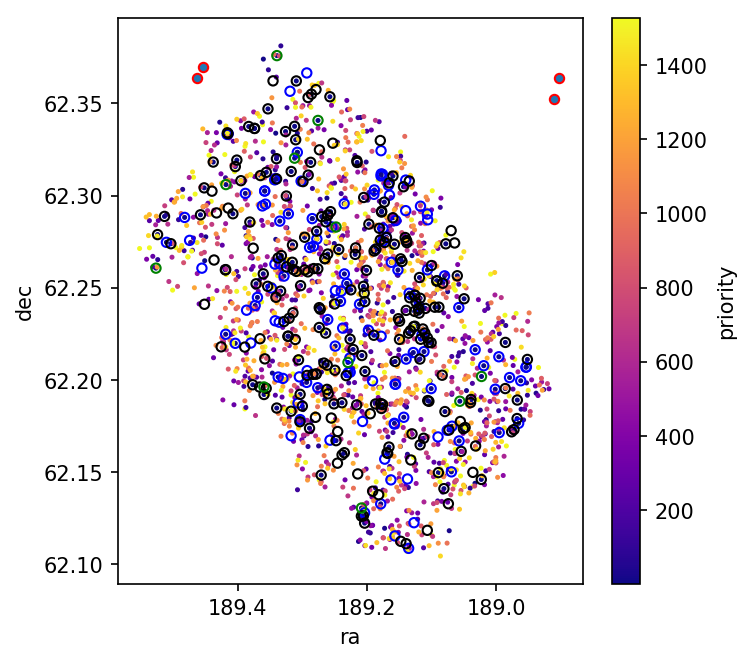

In [414]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150)
master_cat_2020A.plot.scatter(x='ra', y='dec', c='priority', colormap='plasma', ax=ax, s=2)

cat_stars.plot.scatter(x='ra', y='dec', ax=ax, lw=1, edgecolors='r')

cat_highzA.plot.scatter(x='ra', y='dec', ax=ax, lw=1, c='none', edgecolors='b')
cat_highzB.plot.scatter(x='ra', y='dec', ax=ax, lw=1, c='none', edgecolors='k')
cat_Sirio[cat_Sirio.priority == 5].plot.scatter(x='ra', y='dec', ax=ax, lw=1, c='none', edgecolors='g')

ax.invert_xaxis()

# Check new masks

In [439]:
print(pri_counts)

N_highzA, N_highzB, N_Sirio, tot = 0, 0, 0, 0

all_on_slits = []
for i in range(1,5):
    print('\n',s)
    slits = pd.read_csv('masks/2020/BLAS_2020A_%i_slits.csv' % i)
    pri_slit_counts = np.rint(slits.priority)[slits.priority < 6].value_counts().sort_index()
    print(pri_slit_counts)
    print(len(slits))
    slits['priority'] = np.rint(slits['priority'])
    slits['mask'] = '2020A_%i' % i
    all_on_slits.append(slits)
    try:
        N_highzA += pri_slit_counts[3]
    except:
        pass
    try:
        N_highzB += pri_slit_counts[4]
    except:
        pass
    try:
        N_Sirio  += pri_slit_counts[5]
    except:
        pass
    
    tot += len(slits)
    
print('\nHighz A: %i/%i, Highz B: %i/%i, total highz: %i/%i, Sirio: %i/%i' % (N_highzA, pri_counts[3], N_highzB, pri_counts[4], N_highzA+N_highzB, pri_counts[3]+pri_counts[4], N_Sirio, pri_counts[5]))
print(tot)

all_on_slits_df = pd.concat(all_on_slits, axis=0)

1     13
2      3
3     78
4    199
5     11
Name: priority, dtype: int64

 slits_center
1.0     8
3.0    38
4.0    47
5.0     1
Name: priority, dtype: int64
170

 slits_center
1.0     4
3.0    20
4.0    52
5.0     3
Name: priority, dtype: int64
151

 slits_center
1.0     2
3.0    12
4.0    44
5.0     1
Name: priority, dtype: int64
153

 slits_center
1.0     3
2.0     2
3.0     6
4.0    23
5.0     3
Name: priority, dtype: int64
108

Highz A: 76/78, Highz B: 166/199, total highz: 242/277, Sirio: 8/11
582


In [440]:
all_on_slits_df = all_on_slits_df.sort_values(['priority','mask']).reset_index(drop=True)
all_on_slits_df.to_csv('target_lists/2020A/BLAS_2020A_allslits.csv', index=False, float_format='%.6f')

# Sirio
all_on_slits_df[['name','ra', 'dec', 'mask', 'priority']][all_on_slits_df['name'].str.contains('Q', regex=False)]

# MMIRS
all_on_slits_df[['name','ra', 'dec', 'mask', 'priorit']][(all_on_slits_df['priority'] > 5) & (all_on_slits_df['priority'] < 1527)]

,name,ra,dec,mask
269,3DHST_24964,189.450912,62.264668,2020A_4
270,3DHST_36690,189.209793,62.342331,2020A_3
271,3DHST_5447,189.251968,62.167175,2020A_2
272,3DHST_9557,189.265121,62.189430,2020A_2
273,3DHST_10413,189.111145,62.193996,2020A_2
274,3DHST_7009,189.307587,62.177124,2020A_2
275,3DHST_35973,189.341034,62.333809,2020A_3
276,3DHST_31301,189.261826,62.298607,2020A_2
277,3DHST_38053,189.360138,62.373989,2020A_3
278,3DHST_8703,189.138687,62.185291,2020A_2


In [387]:
# Remove first mask
mask2020_1 = pd.read_csv('/home/cmason/Downloads/slits.csv')

mask2020_2 = master_cat_2020A.copy()
mask2020_2 = mask2020_2[~master_cat_2020A['name'].isin(mask2020_1['name'])].reset_index(drop=True)

master_cat_2020A_2 = pd.concat([cat_stars, mask2020_2], axis=0)
master_cat_2020A_2.to_csv('target_lists/bino_master_cat_2020A_remove2020A_1.csv', index=False, float_format='%.6f')

In [382]:
# Remove 2nd mask
mask2020_2 = pd.read_csv('/home/cmason/Downloads/slits(1).csv')

mask2020_3 = master_cat_2020A_2.copy()
mask2020_3 = mask2020_3[~master_cat_2020A_2['name'].isin(mask2020_2['name'])].reset_index(drop=True)

master_cat_2020A_3 = pd.concat([cat_stars, mask2020_3], axis=0)
master_cat_2020A_3.to_csv('target_lists/bino_master_cat_2020A_remove2020A_2.csv', index=False, float_format='%.6f')

In [384]:
# Remove 3rd mask
mask2020_3 = pd.read_csv('/home/cmason/Downloads/slits(2).csv')

mask2020_4 = master_cat_2020A_3.copy()
mask2020_4 = mask2020_4[~master_cat_2020A_3['name'].isin(mask2020_3['name'])].reset_index(drop=True)

master_cat_2020A_4 = pd.concat([cat_stars, mask2020_4], axis=0)
master_cat_2020A_4.to_csv('target_lists/bino_master_cat_2020A_remove2020A_3.csv', index=False, float_format='%.6f')